Predicting the Behavior of the Supreme Court of the United States: A General Approach
==================
  *  __Title__: Predicting the Behavior of the Supreme Court of the United States: A General Approach
  *  __Authors__: [Daniel Martin Katz](http://www.law.msu.edu/faculty_staff/profile.php?prof=780), [Michael J Bommarito II](http://bommaritollc.com/), [Josh Blackman](http://joshblackman.com)
  *  __Paper URL__: [http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2463244](http://papers.ssrn.com/sol3/papers.cfm?abstract_id=2463244)
  *  __Blog URL__: [http://lexpredict.com/portfolio/predicting-the-supreme-court/](http://lexpredict.com/portfolio/predicting-the-supreme-court/)

## Paper Abstract
Building upon developments in theoretical and applied machine learning, as well as the efforts of various scholars including Guimera and Sales-Pardo (2011), Ruger et al. (2004), and Martin et al. (2004), we construct a model designed to predict the voting behavior of the Supreme Court of the United States. Using the extremely randomized tree method first proposed in Geurts, et al. (2006), a method similar to the random forest approach developed in Breiman (2001), as well as novel feature engineering, we predict more than sixty years of decisions by the Supreme Court of the United States (1953-2013). Using only data available prior to the date of decision, our model correctly identifies 69.7% of the Court’s overall affirm/reverse decisions and correctly forecasts 70.9% of the votes of individual justices across 7,700 cases and more than 68,000 justice votes. Our performance is consistent with the general level of prediction offered by prior scholars. However, our model is distinctive as it is the first robust, generalized,and fully predictive model of Supreme Court voting behavior offered to date. Our model predicts six decades of behavior of thirty Justices appointed by thirteen Presidents. With a more sound methodological foundation, our results represent a major advance for the science of quantitative legal prediction and portend a range of other potential applications, such as those described in Katz (2013).

## Source Description
The source and data in this repository allow for the reproduction of the results in this paper.  

## Data Description
The data used in this paper is available from the [Supreme Court Database (SCDB)](http://scdb.wustl.edu/).

## Version
The latest version of this model was relesed in October 2015.

In [2]:
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import statsmodels.stats.proportion

# seaborn
import seaborn
seaborn.set()
seaborn.set_style("darkgrid")

# Project imports
from model import *

/home/ubuntu/ve/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [42]:
# Load data
data = pandas.read_csv("data/output/model_output_100_20151205221226.csv")

# Merge the vote summary data
vote_data = data.groupby("docketId")["justice_outcome_disposition"].value_counts().unstack().fillna(0).astype(int)
vote_data.columns = ["vote_other", "vote_affirm", "vote_reverse"]
predicted_vote_data = data.groupby("docketId")["rf_predicted"].value_counts().unstack().fillna(0).astype(int)
predicted_vote_data.columns = ["predicted_vote_other", "predicted_vote_affirm", "predicted_vote_reverse"]
data = data.join(vote_data, on="docketId")
data = data.join(predicted_vote_data, on="docketId")

data.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,rf_predicted_case,dummy_predicted_case,rf_correct_case,dummy_correct_case,vote_other,vote_affirm,vote_reverse,predicted_vote_other,predicted_vote_affirm,predicted_vote_reverse
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,NaN,NaN,NaN,NaN,0,1,8,NaN,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,NaN,NaN,NaN,NaN,0,1,8,NaN,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,NaN,NaN,NaN,NaN,0,1,8,NaN,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,NaN,NaN,NaN,NaN,0,1,8,NaN,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,NaN,NaN,NaN,NaN,0,1,8,NaN,NaN,NaN


In [43]:
# Get case data
case_data = data.loc[:, ["docketId", "caseName", "term", 
                         u'rf_predicted_case', u'dummy_predicted_case', u'rf_correct_case', u'dummy_correct_case',
                        "vote_other", "vote_affirm", "vote_reverse",
                         "predicted_vote_other", "predicted_vote_affirm", "predicted_vote_reverse"
                        ]]\
    .copy().drop_duplicates()
case_data.tail()

,docketId,caseName,term,rf_predicted_case,dummy_predicted_case,rf_correct_case,dummy_correct_case,vote_other,vote_affirm,vote_reverse,predicted_vote_other,predicted_vote_affirm,predicted_vote_reverse
77297,2014-071-01,GLOSSIP v. GROSS,2014,1,1,0,0,0,5,4,0,0,9
77306,2014-072-01,MATA v. LYNCH,2014,1,1,1,1,0,1,8,0,1,8
77315,2014-073-01,WOODS v. DONALD,2014,1,1,1,1,0,0,9,0,0,9
77324,2014-074-01,GRADY v. NORTH CAROLINA,2014,1,1,1,1,0,0,9,0,0,9
77333,2014-075-01,TAYLOR v. BARKES,2014,1,1,1,1,0,0,9,0,0,9


In [44]:
# Get accuracy by actual outcomes
case_data.groupby(["vote_affirm", "vote_reverse"])["rf_correct_case"].mean().unstack()

vote_reverse,0,1,2,3,4,5,6,7,8,9
vote_affirm,,,,,,,,,,
0,0.504854,NaN,NaN,NaN,NaN,1.000000,1.000000,0.952381,0.953317,0.932784
1,NaN,NaN,NaN,NaN,1.000000,1.000000,0.916667,0.906475,0.922197,NaN
2,NaN,NaN,NaN,NaN,1.000000,0.928571,0.934343,0.905380,NaN,NaN
3,NaN,NaN,NaN,NaN,0.851852,0.916667,0.898256,NaN,NaN,NaN
4,NaN,0.000000,0.500000,0.055556,NaN,0.897059,NaN,NaN,NaN,NaN
5,0.000000,NaN,0.222222,0.204819,0.172917,NaN,NaN,NaN,NaN,NaN
6,0.125000,0.083333,0.277778,0.192837,NaN,NaN,NaN,NaN,NaN,NaN
7,0.097561,0.245283,0.194444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.198276,0.236686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Get accuracy by predicted outcomes
case_data.groupby(["predicted_vote_affirm", "predicted_vote_reverse"])["rf_correct_case"].mean().unstack()

predicted_vote_reverse,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
predicted_vote_affirm,,,,,,,,,,
0,0.921182,0.800000,1.000000,0.833333,0.750000,0.166667,0.333333,0.642857,0.746914,0.732963
1,NaN,NaN,NaN,1.000000,NaN,NaN,0.428571,0.618182,0.687573,NaN
2,0.000000,NaN,NaN,NaN,NaN,0.500000,0.684211,0.665837,NaN,NaN
3,NaN,NaN,NaN,NaN,0.666667,0.555556,0.602528,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.578947,0.589633,NaN,NaN,NaN,NaN
5,NaN,NaN,0.000000,0.666667,0.467836,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,0.583333,0.588608,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.500000,0.539568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.666667,0.520548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Get justice name map
justice_names = data.loc[:, ["justice", "justiceName"]].drop_duplicates()
justice_names.index = justice_names["justice"]
del justice_names["justice"]
justice_map = justice_names["justiceName"].T.to_dict()

In [131]:
justice_accuracy_by_termjustice_dummy_by_term

,78,79,80,81,82,84,85,86,87,88,...,SGBreyer,SMinton,SSotomayor,TCClark,TMarshall,WBRutledge,WEBurger,WHRehnquist,WJBrennan,WODouglas
term,,,,,,,,,,,,,,,,,,,,,
1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# Get accuracy by justice-term
justice_accuracy_by_term = data.groupby(["term", "justice"])["rf_correct"].mean().unstack()
justice_dummy_by_term = data.groupby(["term", "justice"])["dummy_correct"].mean().unstack()
justice_count_by_term = data.groupby(["term", "justice"])["rf_correct"].count().unstack()
justice_accuracy_by_term.columns = justice_map.values()
justice_count_by_term.columns = justice_map.values()
justice_dummy_by_term.columns = justice_map.values()

# Reset very small sample sizes
justice_accuracy_by_term[(justice_count_by_term > 0) & (justice_count_by_term < 10)] = numpy.nan
justice_dummy_by_term[(justice_count_by_term > 0) & (justice_count_by_term < 10)] = numpy.nan
justice_accuracy_by_term.head(10).append(justice_accuracy_by_term.tail(10))

,HLBlack,SFReed,FFrankfurter,WODouglas,FMurphy,RHJackson,WBRutledge,HHBurton,FMVinson,TCClark,...,AScalia,AMKennedy,DHSouter,CThomas,RBGinsburg,SGBreyer,JGRoberts,SAAlito,SSotomayor,EKagan
term,,,,,,,,,,,,,,,,,,,,,
1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,0.600000,0.484211,0.421053,0.526316,NaN,0.400000,NaN,0.421053,0.547368,0.326316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,0.612069,0.568966,0.465517,0.568966,NaN,0.405172,NaN,0.568966,0.586207,0.508621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,0.625000,0.477273,0.397727,0.454545,NaN,0.465909,NaN,0.556818,NaN,0.488636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,0.721649,0.628866,0.577320,0.670103,NaN,NaN,NaN,0.608247,NaN,0.577320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


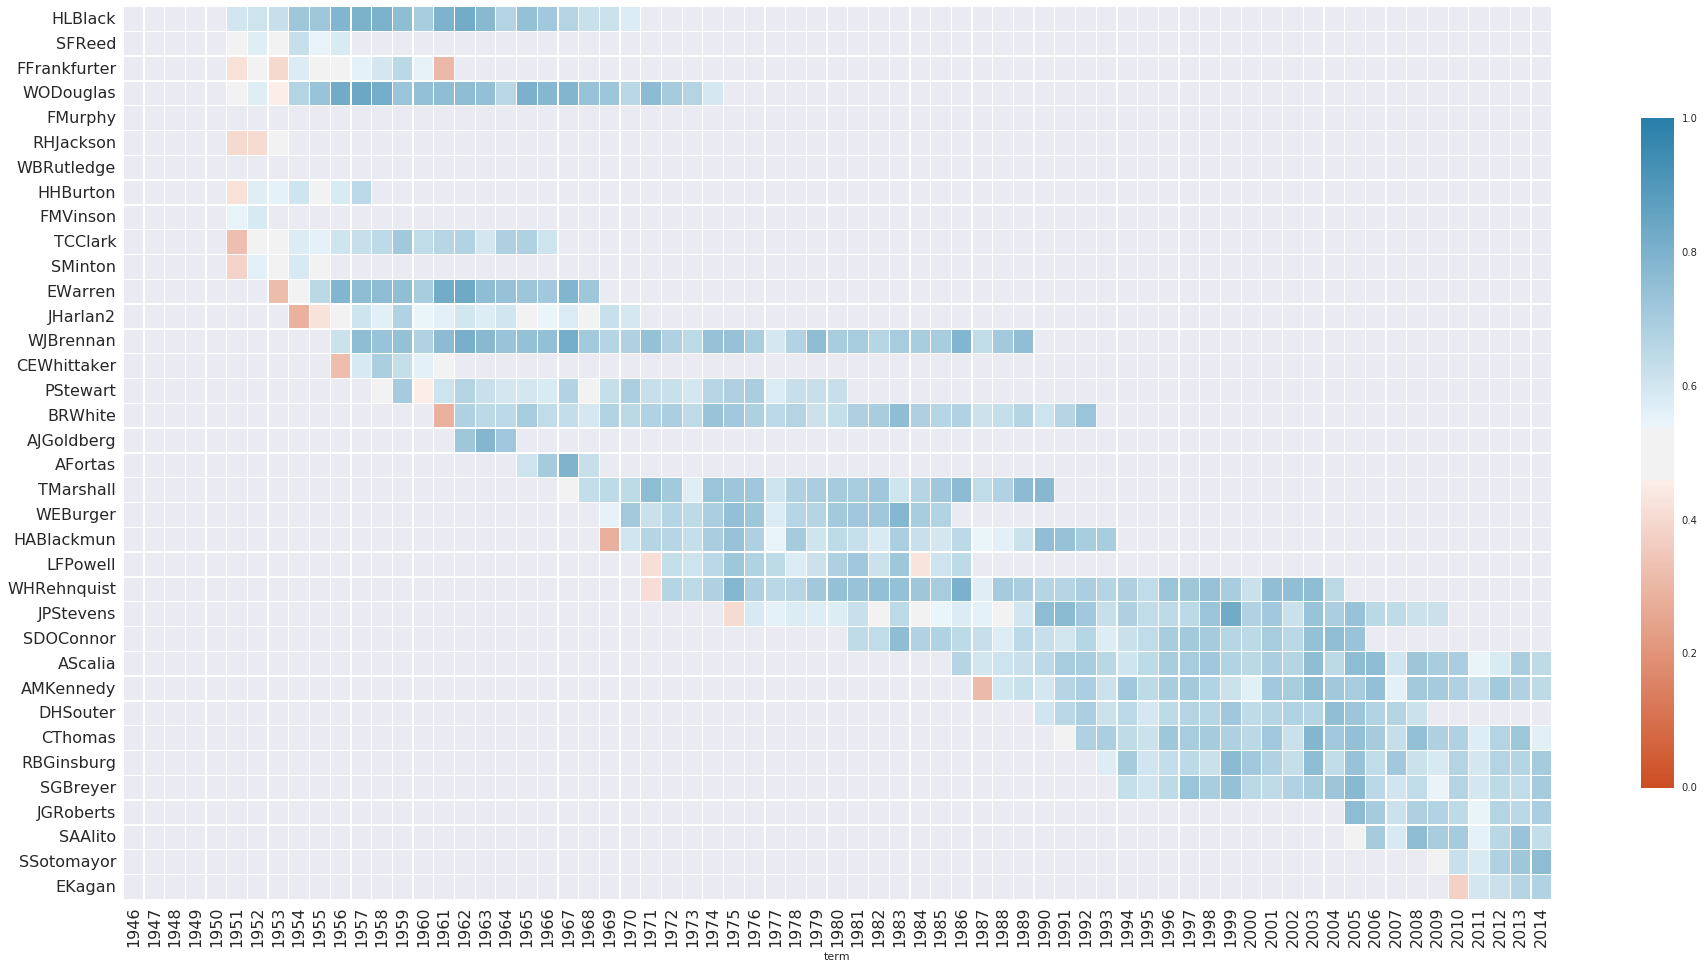

In [138]:
# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(20, 255-20, s=90, sep=20, n=10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
f = plt.figure(figsize=(32, 16))
seaborn.heatmap(justice_accuracy_by_term.T, cmap=cmap,
                vmin=0.0, vmax=1.0,
                linewidths=.25,
                cbar_kws={"shrink": 0.75})
_ = plt.xticks(rotation=90, fontsize=16)
_ = plt.yticks(fontsize=16)

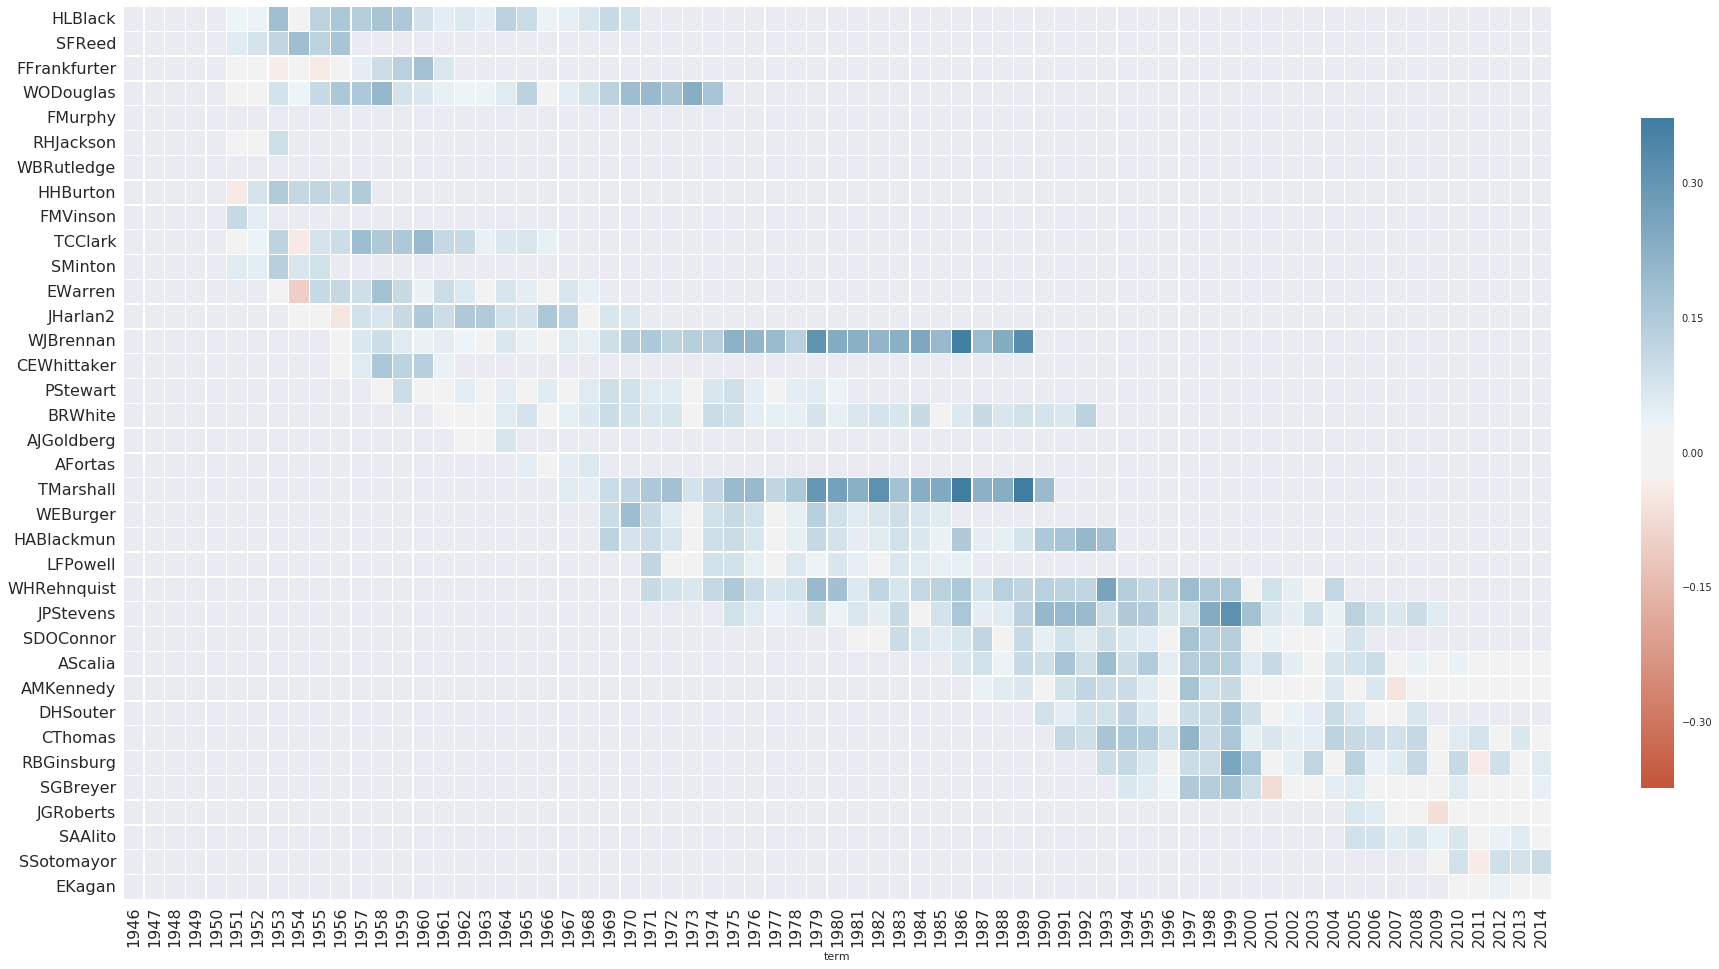

In [142]:
# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(20, 255-20, s=75, sep=20, n=10, as_cmap=True)
#cmap = seaborn.cubehelix_palette(8, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
f = plt.figure(figsize=(32, 16))
seaborn.heatmap((justice_accuracy_by_term - justice_dummy_by_term).T, cmap=cmap,
                linewidths=.25, cbar_kws={"shrink": 0.75})
_ = plt.xticks(rotation=90, fontsize=16)
_ = plt.yticks(fontsize=16)

In [146]:
# Show averages by justice
accuracy_by_justice = pandas.DataFrame(data.groupby("justiceName")["rf_correct"].mean())
accuracy_by_justice.sort_values("rf_correct", ascending=False)

,rf_correct
justiceName,
AJGoldberg,0.742616
EWarren,0.725455
WODouglas,0.718999
WJBrennan,0.714957
HLBlack,0.709941
AFortas,0.698276
WHRehnquist,0.691170
WEBurger,0.681867
TMarshall,0.679299


In [149]:
# Show averages by justice
accuracy_spread_by_justice = pandas.DataFrame(data.groupby("justiceName")["rf_correct"].mean() -\
                                      data.groupby("justiceName")["dummy_correct"].mean(),
                                              columns=["accuracy_spread"])
accuracy_spread_by_justice.sort_values("accuracy_spread", ascending=False)

,accuracy_spread
justiceName,
TMarshall,0.192833
WJBrennan,0.147313
SFReed,0.114964
WHRehnquist,0.113466
WODouglas,0.103682
CEWhittaker,0.101449
HHBurton,0.098089
JPStevens,0.097607
CThomas,0.094241


In [154]:
data.groupby("vote_reverse")["rf_correct"].mean()

vote_reverse
0    0.394094
1    0.345515
2    0.438407
3    0.510828
4    0.623351
5    0.647180
6    0.716535
7    0.753607
8    0.810732
9    0.876207
Name: rf_correct, dtype: float64

In [162]:
# Show averages by number of reverses
accuracy_by_reverse = pandas.DataFrame(data.groupby("vote_reverse")["rf_correct_case"].mean())
accuracy_by_reverse.sort_index()

,rf_correct_case
vote_reverse,
0,0.293337
1,0.230185
2,0.218895
3,0.190327
4,0.219892
5,0.904306
6,0.909273
7,0.911298
8,0.937043


In [163]:
# Show averages by number of reverses
accuracy_spread_by_reverse = pandas.DataFrame(data.groupby("vote_reverse")["rf_correct_case"].mean() -\
                                       data.groupby("vote_reverse")["dummy_correct_case"].mean(),
                                       columns=["accuracy_spread"])
accuracy_spread_by_reverse.sort_index()

,accuracy_spread
vote_reverse,
0,0.293337
1,0.230185
2,0.218895
3,0.190327
4,0.153946
5,-0.095694
6,-0.090727
7,-0.088702
8,-0.062957
